Importing the Dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
filenames = os.listdir('/content/drive/MyDrive/Cloth_recommendation/ResNet50')

In [ ]:
type(filenames)

list

In [ ]:
filenames

In [ ]:
len(filenames)

1700

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['305.jpg', '662.jpg', '729.jpg', '806.jpg', '356.jpg']
['508.jpg', '792.jpg', '836.jpg', '747.jpg', '762.jpg']


**Labels Processing**

In [ ]:
labels_df = pd.read_csv('/content/drive/MyDrive/Cloth_recommendation/ResNet50Labels.csv')

In [ ]:
labels_df.shape

(1700, 2)

In [ ]:
labels_df.head()

,id,label
0,1,Blouse
1,2,Blouse
2,3,Blouse
3,4,Blouse
4,5,Blouse


In [ ]:
labels_df[labels_df['id'] == 1700]

,id,label
1699,1700,Tshirt


In [ ]:
labels_df.head(10)

,id,label
0,1,Blouse
1,2,Blouse
2,3,Blouse
3,4,Blouse
4,5,Blouse
5,6,Blouse
6,7,Blouse
7,8,Blouse
8,9,Blouse
9,10,Blouse


In [ ]:
labels_df.tail(10)

,id,label
1690,1691,Tshirt
1691,1692,Tshirt
1692,1693,Tshirt
1693,1694,Tshirt
1694,1695,Tshirt
1695,1696,Tshirt
1696,1697,Tshirt
1697,1698,Tshirt
1698,1699,Tshirt
1699,1700,Tshirt


In [ ]:
labels_df['label'].value_counts()

Frock     800
Blouse    300
Pants     300
Tshirt    300
Name: label, dtype: int64

In [ ]:
labels_df['label']

0       Blouse
1       Blouse
2       Blouse
3       Blouse
4       Blouse
         ...  
1695    Tshirt
1696    Tshirt
1697    Tshirt
1698    Tshirt
1699    Tshirt
Name: label, Length: 1700, dtype: object

In [ ]:
labels_dictionary = {'Blouse':0, 'Frock':1, 'Pants':2, 'Tshirt':3}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])
print(labels[-5:])

[0, 0, 0, 0, 0]
[3, 3, 3, 3, 3]


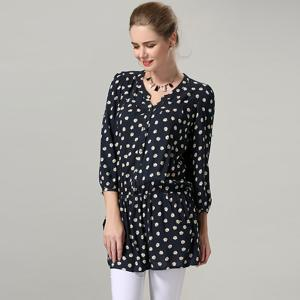

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Cloth_recommendation/ResNet50/1.jpg')
cv2_imshow(img)

In [ ]:
labels_df[labels_df['id'] == 1]

,id,label
0,1,Blouse


In [ ]:
labels_df.head()

,id,label
0,1,Blouse
1,2,Blouse
2,3,Blouse
3,4,Blouse
4,5,Blouse


In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[1696, 1697, 1698, 1699, 1700]


**Resizing all the images**

In [ ]:
#creating a directory for resized images
os.mkdir('/content/drive/MyDrive/Cloth_recommendation/image resized')

In [ ]:
original_folder = '/content/drive/MyDrive/Cloth_recommendation/ResNet50/'
resized_folder = '/content/drive/MyDrive/Cloth_recommendation/image resized/'

for i in range(1700):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((256, 256))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

## **Image Processing**

In [ ]:
# convert images to numpy arrays

train_data_folder = '/content/drive/MyDrive/Cloth_recommendation/image resized/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.jpg')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

1700

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(256, 256, 3)

In [ ]:
data[0]     

array([[[199, 198, 193],
        [199, 198, 193],
        [199, 198, 193],
        ...,
        [183, 182, 178],
        [183, 182, 178],
        [183, 182, 178]],

       [[199, 198, 193],
        [199, 198, 193],
        [199, 198, 193],
        ...,
        [184, 183, 179],
        [183, 182, 178],
        [183, 182, 178]],

       [[199, 198, 193],
        [199, 198, 193],
        [199, 198, 193],
        ...,
        [184, 183, 179],
        [184, 183, 179],
        [183, 182, 178]],

       ...,

       [[184, 183, 179],
        [184, 183, 179],
        [184, 183, 179],
        ...,
        [194, 193, 188],
        [194, 193, 188],
        [194, 193, 188]],

       [[184, 183, 179],
        [184, 183, 179],
        [184, 183, 179],
        ...,
        [194, 193, 188],
        [194, 193, 188],
        [194, 193, 188]],

       [[184, 183, 179],
        [184, 183, 179],
        [184, 183, 179],
        ...,
        [194, 193, 188],
        [194, 193, 188],
        [194, 193, 188]]

In [ ]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(1700, 256, 256, 3)
(1700,)


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1700, 256, 256, 3) (1360, 256, 256, 3) (340, 256, 256, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train_scaled

In [ ]:
X_train[0]

**ResNet50**

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
num_of_classes = 4

model = models.Sequential()
# model.add(layers.UpSampling2D((2,2)))
# model.add(layers.UpSampling2D((2,2)))
# model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=30)

Epoch 1/30
39/39 [==============================] - 63s 470ms/step - loss: 1.6643 - acc: 0.3170 - val_loss: 250.3483 - val_acc: 0.1029
Epoch 2/30
39/39 [==============================] - 15s 387ms/step - loss: 1.4598 - acc: 0.4003 - val_loss: 271.6008 - val_acc: 0.2868
Epoch 3/30
39/39 [==============================] - 15s 392ms/step - loss: 1.2910 - acc: 0.4698 - val_loss: 1.2549 - val_acc: 0.5221
Epoch 4/30
39/39 [==============================] - 15s 389ms/step - loss: 1.2237 - acc: 0.4804 - val_loss: 1.3086 - val_acc: 0.5221
Epoch 5/30
39/39 [==============================] - 15s 386ms/step - loss: 1.1552 - acc: 0.5384 - val_loss: 1.3254 - val_acc: 0.3603
Epoch 6/30
39/39 [==============================] - 15s 388ms/step - loss: 1.0996 - acc: 0.5466 - val_loss: 1.4136 - val_acc: 0.1029
Epoch 7/30
39/39 [==============================] - 15s 389ms/step - loss: 1.0933 - acc: 0.5605 - val_loss: 1.3337 - val_acc: 0.2132
Epoch 8/30
39/39 [==============================] - 15s 388ms/ste

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

11/11 [==============================] - 2s 201ms/step - loss: 0.9751 - acc: 0.7353
Test Accuracy = 0.7352941036224365


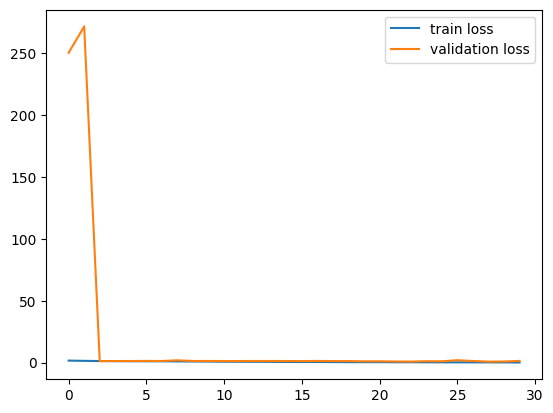

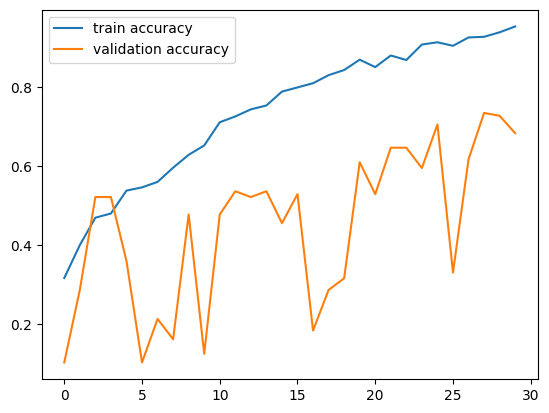

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/drive/MyDrive/Cloth_recommendation/yolov7/2.png


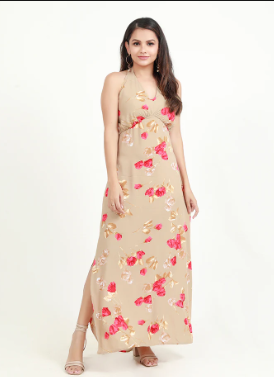

1/1 [==============================] - 0s 41ms/step
[[0.20714918 0.6662324  0.09073475 0.03588371]]
1


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (256,256))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,256,256,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)
